In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Adjust if you know the exact path
df = pd.read_csv("housing.csv")

print(df.head())
print(df.info())
print(df.describe())

   0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00
0   0.02731   0.00   7.070  0  0.4690  6.4210  78...                                              
1   0.02729   0.00   7.070  0  0.4690  7.1850  61...                                              
2   0.03237   0.00   2.180  0  0.4580  6.9980  45...                                              
3   0.06905   0.00   2.180  0  0.4580  7.1470  54...                                              
4   0.02985   0.00   2.180  0  0.4580  6.4300  58...                                              
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 1 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0    0.00632  18.00   2.310  0  0.5380  6.5750  6

In [3]:
print(df.isnull().sum())

 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00    0
dtype: int64


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV with whitespace separator
df = pd.read_csv("housing.csv", sep="\s+", engine='python')  # <- FIXED HERE

# Show basic info
print(df.head())
print(df.info())


   0.00632  18.00  2.310  0  0.5380  6.5750  65.20  4.0900  1  296.0  15.30  \
0  0.02731    0.0   7.07  0   0.469   6.421   78.9  4.9671  2  242.0   17.8   
1  0.02729    0.0   7.07  0   0.469   7.185   61.1  4.9671  2  242.0   17.8   
2  0.03237    0.0   2.18  0   0.458   6.998   45.8  6.0622  3  222.0   18.7   
3  0.06905    0.0   2.18  0   0.458   7.147   54.2  6.0622  3  222.0   18.7   
4  0.02985    0.0   2.18  0   0.458   6.430   58.7  6.0622  3  222.0   18.7   

   396.90  4.98  24.00  
0  396.90  9.14   21.6  
1  392.83  4.03   34.7  
2  394.63  2.94   33.4  
3  396.90  5.33   36.2  
4  394.12  5.21   28.7  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0.00632  505 non-null    float64
 1   18.00    505 non-null    float64
 2   2.310    505 non-null    float64
 3   0        505 non-null    int64  
 4   0.5380   505 non-null    float64
 5  

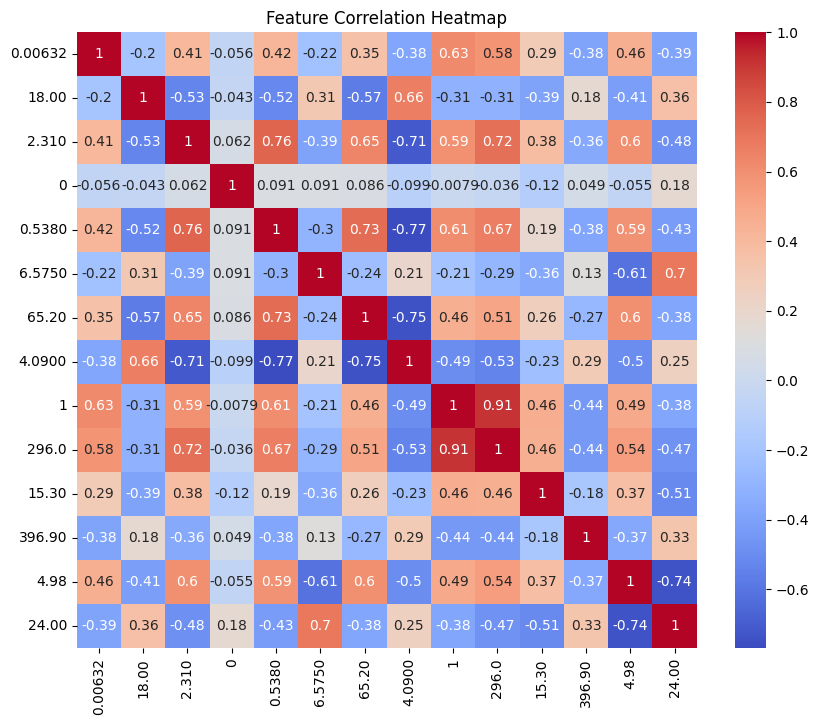

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [6]:
import pandas as pd

# Load with whitespace delimiter
df = pd.read_csv("housing.csv", sep="\s+", header=None)

# Assign column names manually
df.columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]


In [7]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']


In [8]:
# 2. Scale the Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
# 3. Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [10]:
# 4. Train Linear Regression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
# 5. Predict and Evaluate
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 24.29
Root Mean Squared Error: 4.93
R² Score: 0.67


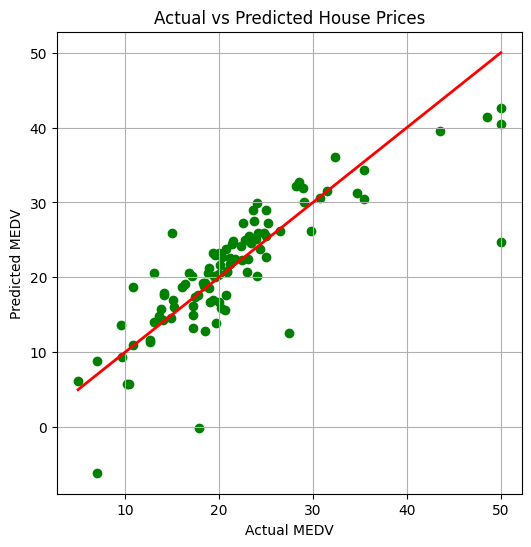

In [12]:
# 6. Visualization: Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()


In [13]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print(f"[Random Forest] RMSE: {rf_rmse:.2f}")
print(f"[Random Forest] R² Score: {rf_r2:.2f}")


[Random Forest] RMSE: 2.82
[Random Forest] R² Score: 0.89
